In [1]:
from utils.clustering_models import KMeansClustering, PrincipleComponentsAnalysis, pca_3d
from utils.pandas_helpers import get_top_features
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
sns.set(style="ticks", color_codes=True)

from IPython.display import display, HTML

In [2]:
""" Data has had scales added to categorical data and normalised between -1 and 1. """
data = pd.read_csv("data/preprocessed_data.csv", index_col=None)

# Optimise to try to find right PCA reduction and cluster size

In [3]:
def pca_and_kmeans(pca_reduction, cluster_size):
    p = PrincipleComponentsAnalysis(data, pca_reduction)
    p = p.reduce()

    k = KMeansClustering(p, cluster_size)
    kmod = k.train()
    cluster_labels,_,_ = k.infer_and_test(kmod)
    return cluster_labels, p

In [4]:
pca_components = [20, 50, 100, 150, 200]
clusters = [2, 3 ,5, 7]
for p in pca_components:
    for c in clusters:
        df2 = data.copy()
        pca_and_kmeans(p, c)

PCA components: 20, describes: 0.32
KMeans: 2 clusters, Calinski-Harabaz_score: 290.25, Silhouette score: 0.21
PCA components: 20, describes: 0.32
KMeans: 3 clusters, Calinski-Harabaz_score: 231.06, Silhouette score: 0.09
PCA components: 20, describes: 0.32
KMeans: 5 clusters, Calinski-Harabaz_score: 164.76, Silhouette score: 0.07
PCA components: 20, describes: 0.32
KMeans: 7 clusters, Calinski-Harabaz_score: 134.42, Silhouette score: 0.07
PCA components: 50, describes: 0.52
KMeans: 2 clusters, Calinski-Harabaz_score: 171.37, Silhouette score: 0.15
PCA components: 50, describes: 0.52
KMeans: 3 clusters, Calinski-Harabaz_score: 132.57, Silhouette score: 0.05
PCA components: 50, describes: 0.52
KMeans: 5 clusters, Calinski-Harabaz_score: 92.77, Silhouette score: 0.04
PCA components: 50, describes: 0.52
KMeans: 7 clusters, Calinski-Harabaz_score: 73.32, Silhouette score: 0.04
PCA components: 100, describes: 0.73
KMeans: 2 clusters, Calinski-Harabaz_score: 118.49, Silhouette score: 0.12
PC

# Visualise clusters with 3D PCA plot

PCA components: 150, describes: 0.86
KMeans: 2 clusters, Calinski-Harabaz_score: 99.79, Silhouette score: 0.11
explained_variance_ratio [0.06824957 0.03947782 0.03037789]


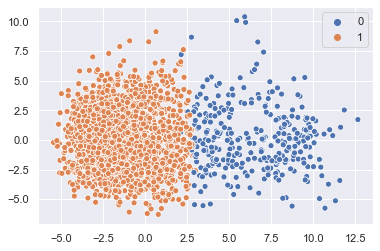

In [4]:
""" Choose PCA params = 150 and 2 clusters optimising for describes and CH score"""
clusters, pca_df = pca_and_kmeans(150, 2) 
pca3_df = pca_3d(pca_df)
clusters = pd.DataFrame(clusters)
clusters.columns = ['clusters']

df_3d = pd.concat([pca3_df, clusters], axis=1, join='inner')
sns.set()

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x=df_3d.x.values, y=df_3d.y.values,
                     hue=df_3d.clusters.values, 
                     data=df_3d)

# Profile accoding to segment averages

In [5]:
features_and_clusters = pd.concat([data, clusters], axis=1)

results = {}
for i in [0, 1]:
    results[str(i)] = get_top_features(features_and_clusters, i)

409
0
409
0


In [6]:
"""Segment 0"""
display(HTML(results['0'].to_html()))

,Feature,SegmentAvg,TotalAvg
0,WAR,0.831250,0.852074
1,FINANCIAL RUIN,0.818750,0.866067
2,STUPIDITY / HERD,0.793750,0.849075
3,"Disgusted, including repelled, nauseated, revolted, awful, disapproving, disappointed",0.781250,0.859070
4,RIOT / FIGHTING,0.775000,0.791104
5,GRIT / DETERMINATION (BLITZ SPIRIT),0.743750,0.855072
6,Duty,0.725000,0.414293
7,"Angry, including let down, humiliated, bitter, aggressive, frustrated, critical",0.725000,0.789105
8,TEAM EFFORT,0.725000,0.699150
9,RELAXATION,0.693750,0.776112


In [7]:
"""Segment 1"""
display(HTML(results['1'].to_html()))

,Feature,SegmentAvg,TotalAvg
0,You should wash your hands for at least 20 seconds to combat the coronavirus,0.970256,0.891054
1,"Going to restaurants, pubs and / or clubs",0.970256,0.774113
2,"Typical coronavirus disease symptoms are fever, cough and shortness of breath",0.970256,0.889055
3,Coronavirus does not exist,0.959548,0.873063
4,Power,0.945271,0.894053
5,Coronavirus spreads through droplets generated when an infected person coughs or sneezes,0.920286,0.826087
6,Attending large groups or gatherings of 10 or more people,0.916716,0.721139
7,"Coronavirus originated in Wuhan, China",0.911957,0.845077
8,There is no reliable vaccine against coronavirus at the moment,0.882213,0.811094
9,GRIT / DETERMINATION (BLITZ SPIRIT),0.876264,0.855072


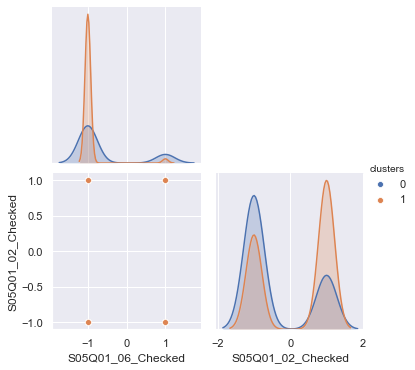

In [11]:
g_red = features_and_clusters[['clusters', 'S05Q01_06_Checked', 'S05Q01_02_Checked']]
sns.pairplot(g_red, hue="clusters", corner=True)

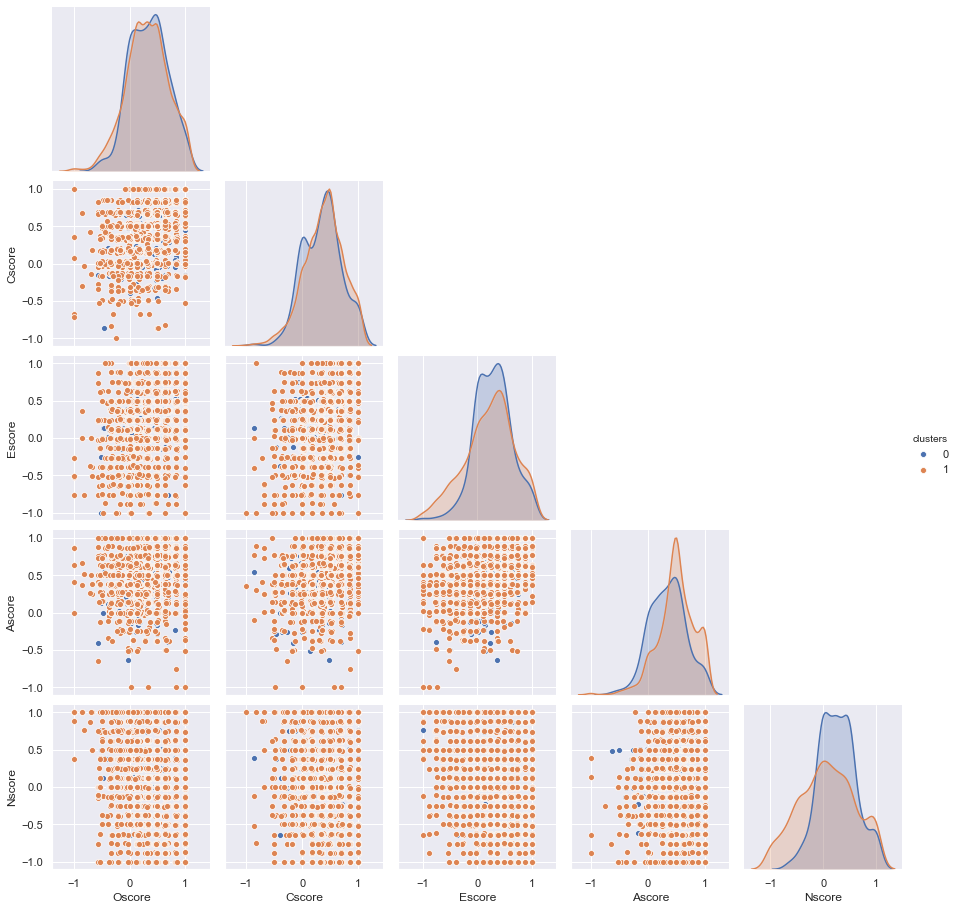

In [12]:
g_red = features_and_clusters[['clusters', 'Oscore', 'Cscore', 'Escore', 'Ascore', 'Nscore']]
sns.pairplot(g_red, hue="clusters", corner=True)

# Summary

The orange segment outweights the blue so we're probably adding some bias there in the results. So trying to make a as sensible conclusions in light of this and the pretty prelim analysis. 

1) Orange is slightly more neurotic compared to blue (and a little different in extraversion too)
2) Orange resonates more with "Kindness: Being honest, loyal, helpful and forgiving" (S05Q01_02 check). Doesn't tie in with neurotism? Orange seems to resonate with "Power: Being wealthy, authoritative, powerful and respected" 
3) There are some noticible differences between their knowledge in the S3Q7 and S3Q7 section for some reason.
